<a href="https://colab.research.google.com/github/Kanyarat-Jirarat/DADS6003_ML/blob/main/DELTA_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 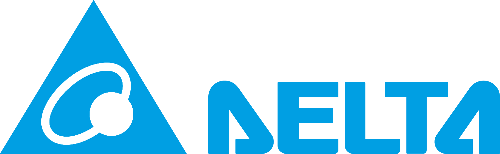 Stock Forecasting


# a. โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ

# Import Data

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [7]:
DT = yf.Ticker('DELTA.bk')
interval = '1h'
start = '2023-6-1'
end = '2023-12-31'
DT_price_df = DT.history(interval=interval,start=start,end=end)
DT_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-06-01 10:00:00+07:00,97.75,100.50,97.75,99.00,0,0.0,0.0
2023-06-01 11:00:00+07:00,99.00,99.00,98.00,98.50,1644624,0.0,0.0
2023-06-01 12:00:00+07:00,98.25,98.75,98.25,98.75,326484,0.0,0.0
2023-06-01 14:00:00+07:00,98.75,99.50,98.75,99.50,1449997,0.0,0.0
2023-06-01 15:00:00+07:00,99.50,99.75,99.00,99.50,4048304,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,90.50,90.50,89.25,89.75,3963472,0.0,0.0
2023-12-28 12:00:00+07:00,90.00,90.00,89.50,90.00,1034619,0.0,0.0
2023-12-28 14:00:00+07:00,90.00,90.25,89.75,90.00,379666,0.0,0.0


In [8]:
df = DT_price_df.copy()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-06-01 10:00:00+07:00,97.75,100.50,97.75,99.00,0,0.0,0.0
2023-06-01 11:00:00+07:00,99.00,99.00,98.00,98.50,1644624,0.0,0.0
2023-06-01 12:00:00+07:00,98.25,98.75,98.25,98.75,326484,0.0,0.0
2023-06-01 14:00:00+07:00,98.75,99.50,98.75,99.50,1449997,0.0,0.0
2023-06-01 15:00:00+07:00,99.50,99.75,99.00,99.50,4048304,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,90.50,90.50,89.25,89.75,3963472,0.0,0.0
2023-12-28 12:00:00+07:00,90.00,90.00,89.50,90.00,1034619,0.0,0.0
2023-12-28 14:00:00+07:00,90.00,90.25,89.75,90.00,379666,0.0,0.0


In [9]:
df = df.iloc[:, :4]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-06-01 10:00:00+07:00,97.75,100.50,97.75,99.00
2023-06-01 11:00:00+07:00,99.00,99.00,98.00,98.50
2023-06-01 12:00:00+07:00,98.25,98.75,98.25,98.75
2023-06-01 14:00:00+07:00,98.75,99.50,98.75,99.50
2023-06-01 15:00:00+07:00,99.50,99.75,99.00,99.50


Ta-lib install **error**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [11]:
import talib as ta

In [12]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X_df = df.iloc[:,:9]
X = X_df.copy()
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-06-07 10:00:00+07:00,102.50,103.00,101.50,102.00,100.850,0.751754,66.338578,1.00,1.50
2023-06-07 11:00:00+07:00,102.50,103.00,102.00,102.50,101.175,0.750519,69.381752,0.50,0.00
2023-06-07 12:00:00+07:00,102.50,102.50,102.00,102.50,101.475,0.717251,69.381752,0.00,0.00
2023-06-07 14:00:00+07:00,102.00,102.50,101.00,102.00,101.800,0.617644,62.415463,-0.50,-0.50
2023-06-07 15:00:00+07:00,101.50,102.00,100.00,100.50,101.700,0.112564,46.764224,-0.50,-0.50
...,...,...,...,...,...,...,...,...,...
2023-12-28 11:00:00+07:00,90.50,90.50,89.25,89.75,92.075,0.901047,22.389591,0.00,-1.25
2023-12-28 12:00:00+07:00,90.00,90.00,89.50,90.00,91.675,0.916392,26.789026,0.25,-0.50
2023-12-28 14:00:00+07:00,90.00,90.25,89.75,90.00,91.275,0.936329,26.789026,0.00,0.00


In [13]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Assuming X is your feature matrix

# Define Target/Dependent Variable

In [14]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [15]:
df['Close']

Datetime
2023-06-07 10:00:00+07:00    102.00
2023-06-07 11:00:00+07:00    102.50
2023-06-07 12:00:00+07:00    102.50
2023-06-07 14:00:00+07:00    102.00
2023-06-07 15:00:00+07:00    100.50
                              ...  
2023-12-28 11:00:00+07:00     89.75
2023-12-28 12:00:00+07:00     90.00
2023-12-28 14:00:00+07:00     90.00
2023-12-28 15:00:00+07:00     88.75
2023-12-28 16:00:00+07:00     88.25
Name: Close, Length: 840, dtype: float64

In [16]:
df['Close'].shift(-1)

Datetime
2023-06-07 10:00:00+07:00    102.50
2023-06-07 11:00:00+07:00    102.50
2023-06-07 12:00:00+07:00    102.00
2023-06-07 14:00:00+07:00    100.50
2023-06-07 15:00:00+07:00    100.50
                              ...  
2023-12-28 11:00:00+07:00     90.00
2023-12-28 12:00:00+07:00     90.00
2023-12-28 14:00:00+07:00     88.75
2023-12-28 15:00:00+07:00     88.25
2023-12-28 16:00:00+07:00       NaN
Name: Close, Length: 840, dtype: float64

# Split The Dataset [70:30]

In [17]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#Logistic Regression

In [18]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [19]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

In [20]:
pd.DataFrame(zip(X_df.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.3665771038439776]
1,High,[0.2567773196203332]
2,Low,[-0.06735013728983606]
3,Close,[-0.8706086464794245]
4,S_10,[0.2758258080512207]
5,Corr,[-0.0023033448233659858]
6,RSI,[-0.14850227088238147]
7,Open-Close,[-0.003678883390554414]
8,Open-Open,[0.3030236850623732]


In [23]:
prediction_date = '2024-12-31'
probability = model.predict_proba(X_test)
probability

array([[0.61891166, 0.38108834],
       [0.57616647, 0.42383353],
       [0.7246341 , 0.2753659 ],
       [0.50743649, 0.49256351],
       [0.73509294, 0.26490706],
       [0.68365221, 0.31634779],
       [0.66981331, 0.33018669],
       [0.63524778, 0.36475222],
       [0.72761862, 0.27238138],
       [0.56415266, 0.43584734],
       [0.68964179, 0.31035821],
       [0.62211948, 0.37788052],
       [0.54088022, 0.45911978],
       [0.69322645, 0.30677355],
       [0.62159262, 0.37840738],
       [0.65520014, 0.34479986],
       [0.66555569, 0.33444431],
       [0.66405581, 0.33594419],
       [0.66591583, 0.33408417],
       [0.52765563, 0.47234437],
       [0.68790388, 0.31209612],
       [0.70528789, 0.29471211],
       [0.72861723, 0.27138277],
       [0.64407781, 0.35592219],
       [0.64187704, 0.35812296],
       [0.70202606, 0.29797394],
       [0.70350427, 0.29649573],
       [0.66483215, 0.33516785],
       [0.65461677, 0.34538323],
       [0.65169097, 0.34830903],
       [0.

In [24]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

# Evaluate The Model

In [25]:
print(metrics.confusion_matrix(y_test, predicted))

[[155   2]
 [ 91   4]]


In [26]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.63      0.99      0.77       157
           1       0.67      0.04      0.08        95

    accuracy                           0.63       252
   macro avg       0.65      0.51      0.42       252
weighted avg       0.64      0.63      0.51       252



In [27]:
print(model.score(X_test,y_test))

0.6309523809523809


In [28]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.64285714 0.64285714 0.61904762 0.64285714 0.63095238 0.61904762
 0.5952381  0.61904762 0.67857143 0.61904762]
0.630952380952381


# Create Trading Strategy Using The Model

In [29]:
pip install matplotlib

In [30]:
import matplotlib.pyplot as plt

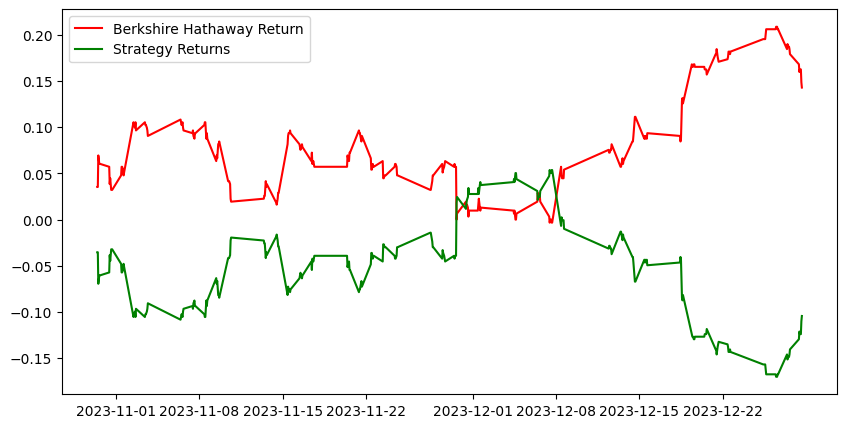

In [31]:
df['Predicted_Signal'] = model.predict(X)
df['Berkshire_Hathaway_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Berkshire_Hathaway_returns = np.cumsum(df[split:]['Berkshire_Hathaway_returns'])

df['Startegy_returns'] = df['Berkshire_Hathaway_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Berkshire_Hathaway_returns, color='r',label = 'Berkshire Hathaway Return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

# b. เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

In [34]:
KCE = yf.Ticker('KCE.bk')

interval = '1h'

start = '2023-1-1'
end = '2023-12-31'

KCE_price_df = KCE.history(interval='1h',start=start,end=end)

df2 = KCE_price_df["Close"]
df2 = pd.DataFrame(df2)
df2

,Close
Datetime,
2023-01-03 10:00:00+07:00,47.25
2023-01-03 11:00:00+07:00,47.00
2023-01-03 12:00:00+07:00,46.75
2023-01-03 14:00:00+07:00,47.00
2023-01-03 15:00:00+07:00,47.00
...,...
2023-12-28 11:00:00+07:00,54.25
2023-12-28 12:00:00+07:00,54.25
2023-12-28 14:00:00+07:00,54.00


In [38]:
merged_df = pd.merge(df.iloc[:,:9], df2,on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Close_y
Datetime,,,,,,,,,,
2023-06-07 10:00:00+07:00,102.5,103.0,101.5,102.0,100.850,0.751754,66.338578,1.0,1.5,37.75
2023-06-07 11:00:00+07:00,102.5,103.0,102.0,102.5,101.175,0.750519,69.381752,0.5,0.0,38.25
2023-06-07 12:00:00+07:00,102.5,102.5,102.0,102.5,101.475,0.717251,69.381752,0.0,0.0,38.25
2023-06-07 14:00:00+07:00,102.0,102.5,101.0,102.0,101.800,0.617644,62.415463,-0.5,-0.5,38.25
2023-06-07 15:00:00+07:00,101.5,102.0,100.0,100.5,101.700,0.112564,46.764224,-0.5,-0.5,38.50


In [39]:
merged_df.rename(columns={'Close_x': 'Close_DELTA'}, inplace=True)
merged_df.rename(columns={'Close_y': 'Close_KCE'}, inplace=True)

Xb_df = merged_df.iloc[:,:10]

Xb = Xb_df.copy()

Xb.head()

,Open,High,Low,Close_DELTA,S_10,Corr,RSI,Open-Close,Open-Open,Close_KCE
Datetime,,,,,,,,,,
2023-06-07 10:00:00+07:00,102.5,103.0,101.5,102.0,100.850,0.751754,66.338578,1.0,1.5,37.75
2023-06-07 11:00:00+07:00,102.5,103.0,102.0,102.5,101.175,0.750519,69.381752,0.5,0.0,38.25
2023-06-07 12:00:00+07:00,102.5,102.5,102.0,102.5,101.475,0.717251,69.381752,0.0,0.0,38.25
2023-06-07 14:00:00+07:00,102.0,102.5,101.0,102.0,101.800,0.617644,62.415463,-0.5,-0.5,38.25
2023-06-07 15:00:00+07:00,101.5,102.0,100.0,100.5,101.700,0.112564,46.764224,-0.5,-0.5,38.50


In [40]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scalerb = StandardScaler()
Xb = scalerb.fit_transform(Xb)  # Assuming X is your feature matrix

In [42]:
yb = np.where(merged_df['Close_DELTA'].shift(-1) > merged_df['Close_DELTA'],1,-1)
yb

array([ 1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1

In [43]:
splitb = int(0.7*len(merged_df))
Xb_train, Xb_test, yb_train, yb_test = Xb[:splitb], Xb[splitb:], yb[:splitb], yb[splitb:]

In [44]:
modelb = LogisticRegression(max_iter=1000)
modelb = modelb.fit(Xb_train,yb_train)

In [45]:
pd.DataFrame(zip(Xb_df.columns, np.transpose(modelb.coef_)))

,0,1
0,Open,[0.3118894260710135]
1,High,[0.2557515775405462]
2,Low,[0.033721638919216534]
3,Close_DELTA,[-0.7794687121610072]
4,S_10,[0.06378913710221448]
5,Corr,[-0.017843019736568363]
6,RSI,[-0.2652402384332735]
7,Open-Close,[-0.0006357207746621294]
8,Open-Open,[0.30963200933821294]
9,Close_KCE,[-0.2986985720021867]


In [46]:
# Specify the date for prediction
predictionb_date = '2024-12-22'
probabilityb = modelb.predict_proba(Xb_test)
probabilityb

array([[0.64786011, 0.35213989],
       [0.61039069, 0.38960931],
       [0.77060215, 0.22939785],
       [0.56599055, 0.43400945],
       [0.78695808, 0.21304192],
       [0.7420518 , 0.2579482 ],
       [0.72130697, 0.27869303],
       [0.66691314, 0.33308686],
       [0.76139822, 0.23860178],
       [0.58810022, 0.41189978],
       [0.70865245, 0.29134755],
       [0.6384966 , 0.3615034 ],
       [0.58220441, 0.41779559],
       [0.73868497, 0.26131503],
       [0.67268109, 0.32731891],
       [0.69973807, 0.30026193],
       [0.70150895, 0.29849105],
       [0.70435666, 0.29564334],
       [0.74699518, 0.25300482],
       [0.63131419, 0.36868581],
       [0.77169086, 0.22830914],
       [0.78578171, 0.21421829],
       [0.80889959, 0.19110041],
       [0.73068725, 0.26931275],
       [0.73998584, 0.26001416],
       [0.78628219, 0.21371781],
       [0.78823789, 0.21176211],
       [0.75150146, 0.24849854],
       [0.73708195, 0.26291805],
       [0.72613376, 0.27386624],
       [0.

In [47]:
predictedb = modelb.predict(Xb_test)
predictedb

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [48]:
print(metrics.confusion_matrix(yb_test, predictedb))

[[157   0]
 [ 93   2]]


In [49]:
print(metrics.classification_report(yb_test, predictedb))

              precision    recall  f1-score   support

          -1       0.63      1.00      0.77       157
           1       1.00      0.02      0.04        95

    accuracy                           0.63       252
   macro avg       0.81      0.51      0.41       252
weighted avg       0.77      0.63      0.50       252



In [50]:
print(modelb.score(Xb_test,yb_test))

0.6309523809523809


In [51]:
cross_val = cross_val_score(LogisticRegression(), Xb, yb, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.60714286 0.66666667 0.61904762 0.64285714 0.63095238 0.64285714
 0.60714286 0.5952381  0.67857143 0.63095238]
0.6321428571428571


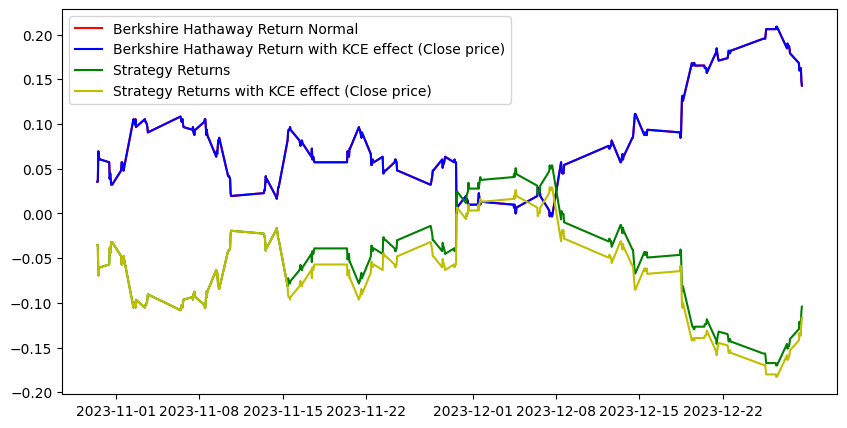

In [52]:
plt.figure(figsize=(10,5))

##เส้นที่ 1 ผลตอบแทนจริงของ DELTA กรณีปกติ
plt.plot(Cumulative_Berkshire_Hathaway_returns, color='r',label = 'Berkshire Hathaway Return Normal')


##เส้นที่ 2 ผลตอบแทนจริงของ DELTA กรณีที่เอาราคาปิดของ KCE มาวิเคราะห์ร่วม/
merged_df['Predicted_Signalb'] = modelb.predict(Xb)
merged_df['DELTA_KCE'] = np.log(merged_df['Close_DELTA']/merged_df['Close_DELTA'].shift(1))
Cumulative_DELTA_AAPL_returns = np.cumsum(merged_df[splitb:]['DELTA_KCE'])
plt.plot(Cumulative_DELTA_AAPL_returns, color='b',label = 'Berkshire Hathaway Return with KCE effect (Close price)')

##เส้นที่ 3 ผลตอบแทนของตาม model กรณีปกติ
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')


##เส้นที่ 4 ผลตอบแทนของตาม model กรณีที่เอาราคาปิดของ KCE มาวิเคราะห์ร่วม
merged_df['Strategy_returnsb'] = merged_df['DELTA_KCE']* merged_df['Predicted_Signalb'].shift(1)
Cumulative_Strategy_returnsb = np.cumsum(merged_df[splitb:]['Strategy_returnsb'])
plt.plot(Cumulative_Strategy_returnsb, color='y', label = 'Strategy Returns with KCE effect (Close price)')


plt.legend()
plt.show()